In [1]:
%matplotlib inline
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [2]:
columns = ['lift', 'angle']
forces = []
with open('./force_X.txt', 'r') as f:
    forces = [float(x.strip()) for x in f.readlines()]

forces = [[forces[i], i] for i in range(len(forces))]
forces = pd.DataFrame(data=forces, columns=columns)
forces.head()

,lift,angle
0,0.010393,0
1,0.655506,1
2,1.680981,2
3,2.274751,3
4,2.858291,4


In [3]:
area = 3.334e-3 # m^2
density_of_air = 1.293
air_speed = 100 # m/s

coeff_of_lift = forces['lift'] / (0.5*density_of_air*(air_speed**2)*area)
coeff_of_lift = pd.DataFrame(data = np.column_stack([coeff_of_lift.values, forces['angle'].values]), columns=['cl', 'angle'])
coeff_of_lift.head()

,cl,angle
0,0.000482,0.0
1,0.030412,1.0
2,0.077988,2.0
3,0.105536,3.0
4,0.132609,4.0


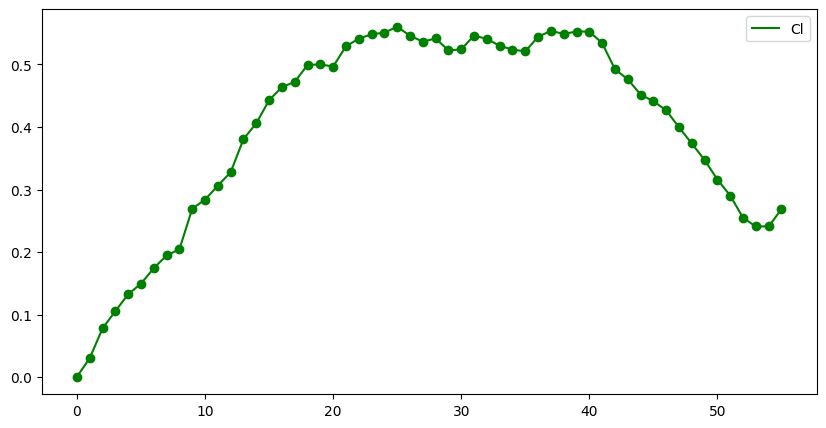

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(coeff_of_lift.values[:, 1], coeff_of_lift.values[:, 0], color='green')
plt.legend(["Cl"])
plt.scatter(coeff_of_lift.values[:, 1], coeff_of_lift.values[:, 0], color='green')
plt.show()

# Polynomial regression
### To find Cl based on angle

Mean Squared Error: 0.0005435464966348377
R-squared: 0.9784311167801514
Coefficients: [ 0.          0.03789803 -0.00061863]


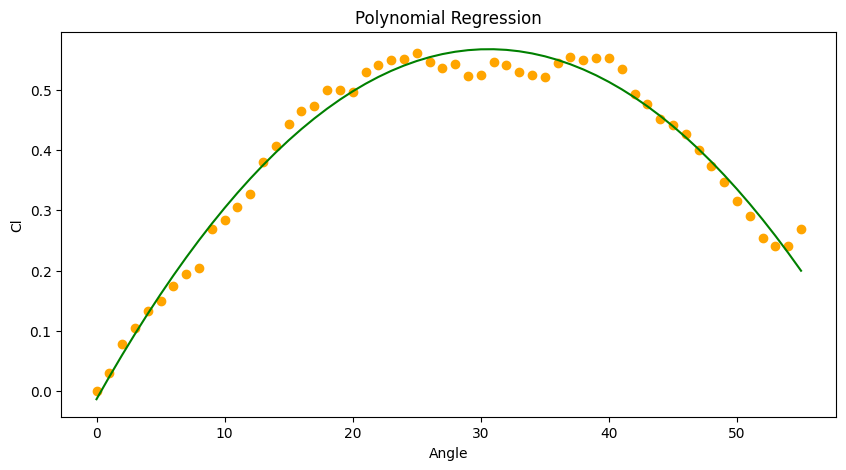

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Example dataset
# Replace this with your actual dataset
X = coeff_of_lift['angle'].values.reshape(-1, 1)
Y = coeff_of_lift['cl'].values

# Polynomial Features
degree = 2  # You can change the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=0)

# Model fitting
model = LinearRegression()
model.fit(X_train, Y_train)

# Predicting
Y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {model.coef_}")

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color='orange')
plt.plot(X, model.predict(X_poly), color='green')
plt.title('Polynomial Regression')
plt.xlabel('Angle')
plt.ylabel('Cl')
plt.show()


In [6]:
test_angles = range(40+1)
test_angles = np.array(test_angles).reshape(-1,1)
pred = model.predict(poly_features.fit_transform(test_angles))
pred = pd.DataFrame(data=[[i, pred[i]] for i in range(40+1)], columns=['angle', 'Cl'])
pred

,angle,Cl
0,0,-0.013356
1,1,0.023923
2,2,0.059965
3,3,0.094770
4,4,0.128338
5,5,0.160668
6,6,0.191762
7,7,0.221617
8,8,0.250236
9,9,0.277617


In [7]:
test_angles = [18.5]
test_angles = np.array(test_angles).reshape(-1,1)
pred = model.predict(poly_features.fit_transform(test_angles))
pred = pd.DataFrame(data=[[test_angles[i, 0], pred[i]] for i in range(test_angles.shape[0])], columns=['angle', 'Cl'])
pred

,angle,Cl
0,18.5,0.476032


In [8]:
# 18	1.873493
# 19	1.933528
y = [1.873493, 1.933528]
x = [18, 19]
cl = 1.88

m = (y[1]-y[0])/(x[1]-x[0])

1/m*(cl-y[0])+x[0]


18.108386774381607

In [9]:
def solve_quadratic(a, b, c, y):
    c_prime = c - y
    discriminant = b**2 - 4*a*c_prime

    if discriminant > 0:
        x1 = (-b + math.sqrt(discriminant)) / (2 * a)
        x2 = (-b - math.sqrt(discriminant)) / (2 * a)
        return (x1, x2)
    elif discriminant == 0:
        x = -b / (2 * a)
        return (x,)
    else:
        # No real roots
        return ()

In [10]:
solve_quadratic(model.coef_[2], model.coef_[1], model.coef_[0], 0.5)

(19.228923981146934, 42.03258953490217)

In [11]:
model.coef_[2], model.coef_[1], model.coef_[0], -5

(-0.00061862700596408, 0.03789802668726148, 0.0, -5)

In [12]:
# calculate squareroot

def sqrt_newton_raphson(S, max_iters=10, tolerance=1e-6):
    x = S / 2  # Initial guess
    for _ in range(max_iters):
        # prev_x = x
        x = (x + S / x) / 2
        # if abs(x - prev_x) < tolerance:
        #     break
    return x

# Example usage
num = 0.874
sqrt_num = sqrt_newton_raphson(num, max_iters=4)
print("Square root:", sqrt_num)


Square root: 0.9348798407260904
